# Fundamental Frequency Tracking Tester

You can feel free to use this file, or you can make a python file to test things, or even put your tests at the bottom of freq.py.  In the case that you use .py files instead of this notebook, save the audio results with the method save_audio in audiotools.py


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from audiotools import *
from effects import *
from freq import *
import IPython.display as ipd

### Compute and plot YIN frequency observations on a file

In [6]:
x_audio, sr = load_audio("cher.wav")
frame_length = 4096
win_length = frame_length//2
hop_length = frame_length//4
all_freqs = get_yin_freqs(x_audio, frame_length, sr)
freqs = pyin_freqs(all_freqs)
y = sonify_pure_tone(x_audio, freqs, frame_length//4, sr)
ipd.Audio(y, rate=sr)

Text(0.5, 1.0, 'cher.wav Yin Frequency Estimates')

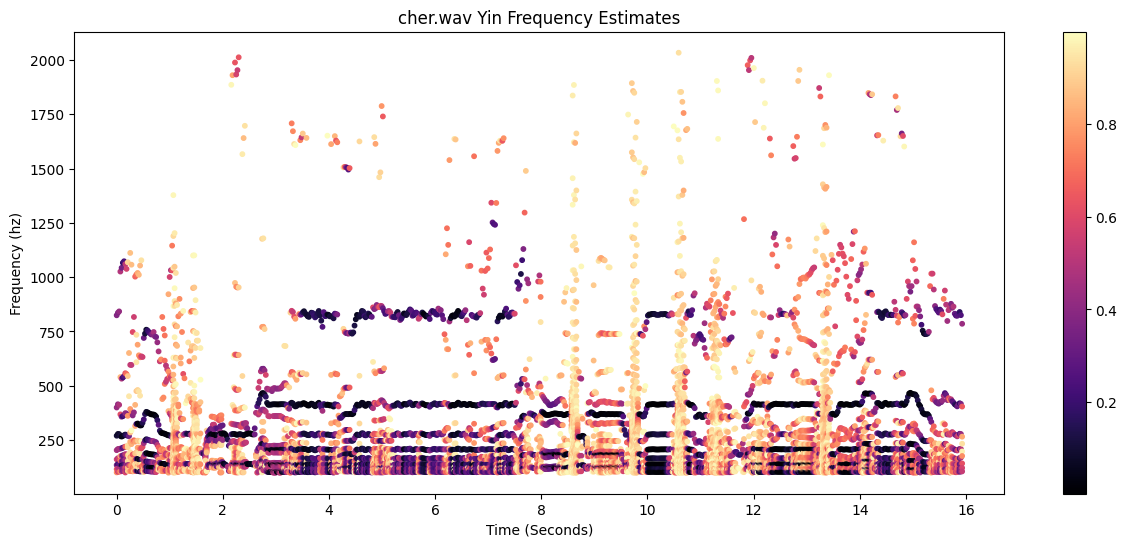

In [3]:
filename = "cher.wav"
x_audio, sr = load_audio(filename)

frame_length = 4096
win_length = frame_length//2
hop_length = frame_length//4

all_freqs = get_yin_freqs(x_audio, frame_length, sr)


X = []
for t, freqs_t in enumerate(all_freqs):
    for (f, thresh) in freqs_t:
        X.append([t, f, thresh])
X = np.array(X)
plt.figure(figsize=(15, 6))
plt.scatter(X[:, 0]*hop_length/sr, X[:, 1], s=10, c=X[:, 2], cmap='magma')
plt.colorbar()
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (hz)")
plt.title(filename + " Yin Frequency Estimates")

### Compute and sonify the results of naive "greedy observation" fundamental frequency estimation

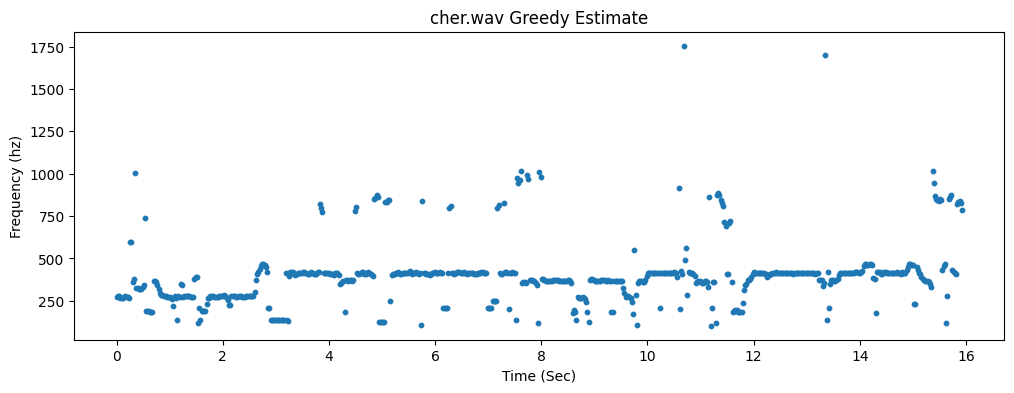

In [5]:
freqs_naive = naive_freqs(all_freqs)
plt.figure(figsize=(12, 4))
plt.scatter(np.arange(freqs_naive.size)*hop_length/sr, freqs_naive, s=10)
y = sonify_pure_tone(x_audio, freqs_naive, frame_length//4, sr)
plt.xlabel("Time (Sec)")
plt.ylabel("Frequency (hz)")
save_audio(y, sr, "marvin_greedy.wav")
plt.title("cher.wav Greedy Estimate")
ipd.Audio(sonify_pure_tone(x_audio, freqs, frame_length//4, sr), rate=sr)

### Compute, plot, and sonify the results of HMM-based "pyin" fundamental frequency estimation

ValueError: x and y must be the same size

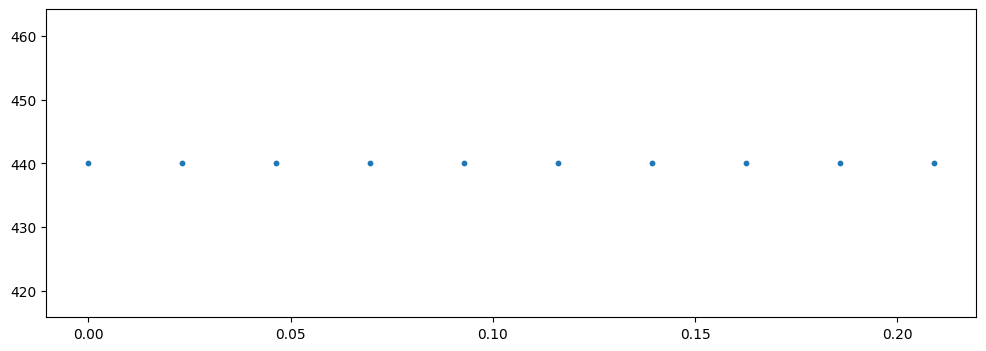

In [10]:
freqs = pyin_freqs(all_freqs)

plt.figure(figsize=(12, 4))
plt.scatter(np.arange(freqs.size)*hop_length/sr, freqs, s=10)
plt.scatter(np.arange(freqs.size)*hop_length/sr, freqs_naive, s=20, marker='x', zorder=0)
plt.ylim([100, 1000])
plt.legend(["pYIN", "Greedy Naive"])
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (hz)")
plt.title("Frequency Estimates for greedy and pYIN Techniques on cher.wav")

ipd.Audio(sonify_pure_tone(x_audio, freqs, frame_length//4, sr), rate=sr)

### Do a wiggly autotune example on Cher

In [12]:
allowed_notes = get_scale("G Flat", major=True)
notes, y_auto = autotune(x_audio, freqs, hop_length, allowed_notes, wiggle_amt=1)
ipd.Audio(y_auto, rate=sr)

### Do FM synthesis to make Cher sound like a trumpet

In [11]:
y_fm = fm_synth(x_audio, freqs, frame_length//4, sr, ratio=2, I=16)
save_audio(y_fm, sr, "cher_bell.wav")
ipd.Audio(y_fm, rate=sr)